In [8]:
pwd

'/home/rohansl/StarterCodeMultimodal/data'

In [9]:
cd data

[Errno 2] No such file or directory: 'data'
/home/rohansl/StarterCodeMultimodal/data


In [10]:
ls

dev.jsonl  img/  LICENSE.txt  README.md  test.jsonl  train.jsonl


In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

In [13]:
train = pd.read_json("/home/rohansl/StarterCodeMultimodal/data/train.jsonl",lines=True)
test = pd.read_json("/home/rohansl/StarterCodeMultimodal/data/test.jsonl",lines=True)

In [19]:
train.tail(10)

,id,img,label,text
8490,50739,img/50739.png,1,whats the difference between a scout and a jew...
8491,14275,img/14275.png,1,i have 72 nukes aimed at israel if these damn ...
8492,83052,img/83052.png,1,when your sister only bangs black guys and get...
8493,19372,img/19372.png,1,if you say these muslim protesters are violent...
8494,21345,img/21345.png,1,"when you re out in public, and your muslim act..."
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...
8499,15937,img/15937.png,1,i hate muslims too they take their religion to...


In [24]:
from PIL import Image
img = Image.open('img/14275.png')

In [26]:
train['label'].value_counts()

0    5450
1    3050
Name: label, dtype: int64

In [32]:
df = pd.read_json("/home/rohansl/StarterCodeMultimodal/data/train.jsonl",lines=True)
df.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [35]:
df = pd.read_csv('csvfile.csv')
df = df[df.label != 0]
df.to_csv('hateful_western.csv', encoding='utf-8', index=False)

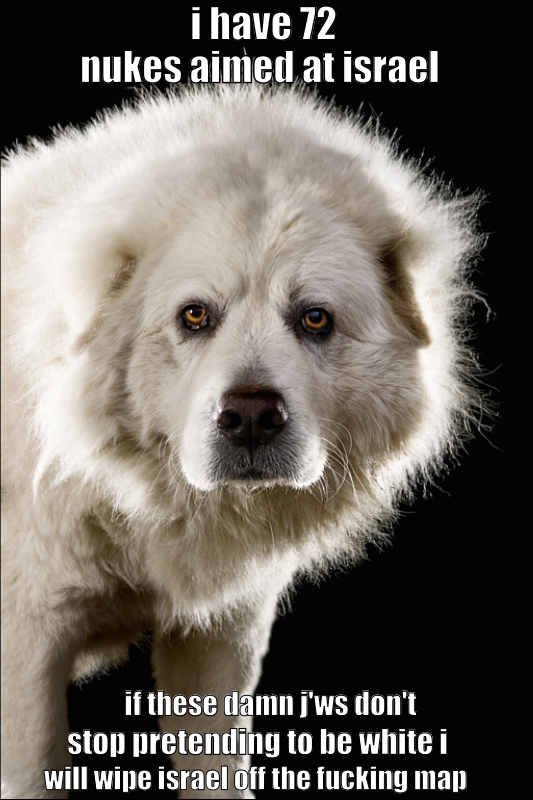

In [25]:
img.show()

In [ ]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
 
 


In [ ]:
def get_word_idx(sent: str):
    return sent.split(" ")
 
 


In [ ]:
 
def get_hidden_states(encoded, model, layers):
    with torch.no_grad():
        output = model(**encoded)
    states = output.hidden_states
     # Stack and sum all requested layers
    output = torch.stack([states[i] for i in layers]).sum(0).squeeze()
     # Only select the tokens that constitute the requested word
    #word_tokens_output = output[token_ids_word]
 
    return output.mean(dim=0)

In [ ]:
 
def get_word_vector(sent, tokenizer, model, layers):
    encoded = tokenizer.encode_plus(sent, return_tensors="pt")
    #token_ids_word = np.where(np.array(encoded.word_ids()) == idx)
 
    return get_hidden_states(encoded, model, layers)
 
 

In [ ]:

def main(layers=None):
    layers = [-4, -3, -2, -1] if layers is None else layers
    tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
    model = AutoModel.from_pretrained("bert-base-cased", output_hidden_states=True)
    
    sent = "I like cookies ." 
    idx = get_word_idx(sent, "cookies")

    word_embedding = get_word_vector(sent, idx, tokenizer, model, layers)
     
    return word_embedding 


In [ ]:
 
 
 if __name__ == '__main__':
        main()

In [ ]:
layers = None
layers = [-4, -3, -2, -1] if layers is None else layers
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModel.from_pretrained("bert-base-cased", output_hidden_states=True)
    
sent = "I like cookies ." 
#dx = get_word_idx(sent, "cookies")

word_embedding = get_word_vector(sent, tokenizer, model, layers)


In [ ]:
X=list(train['text'])

In [ ]:
embedding = []
for i in X:
    word = get_word_vector(i, tokenizer, model, layers)
    embedding.append(word)

In [ ]:
x = embedding

In [ ]:
probs = [t.numpy() for t in x]

In [ ]:
len(probs)#[1].shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(probs, train['label'], test_size=0.2,random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
pip install torchvision

In [ ]:

import torch
from torch import optim, nn
from torchvision import models, transforms
model = models.vgg16(pretrained=True)

In [ ]:

class FeatureExtractor(nn.Module):
    def __init__(self, model):
        super(FeatureExtractor, self).__init__()
		# Extract VGG-16 Feature Layers
        self.features = list(model.features)
        self.features = nn.Sequential(*self.features)
		# Extract VGG-16 Average Pooling Layer
        self.pooling = model.avgpool
		# Convert the image into one-dimensional vector
        self.flatten = nn.Flatten()
		# Extract the first part of fully-connected layer from VGG16
        self.fc = model.classifier[0]
    
    def forward(self, x):
		# It will take the input 'x' until it returns the feature vector called 'out'
        out = self.features(x)
        out = self.pooling(out)
        out = self.flatten(out)
        out = self.fc(out) 
        return out 

# Initialize the model
model = models.vgg16(pretrained=True)
new_model = FeatureExtractor(model)

# Change the device to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
new_model = new_model.to(device)

In [ ]:
pip install opencv-python

In [ ]:
from tqdm import tqdm
import numpy as np

# Transform the image, so it becomes readable with the model
transform = transforms.Compose([
  transforms.ToPILImage(),
  transforms.CenterCrop(512),
  transforms.Resize(448),
  transforms.ToTensor()                              
])

# Will contain the feature
features = []

In [ ]:
transform = transforms.Compose([
  transforms.ToPILImage(),
  transforms.CenterCrop(512),
  transforms.Resize(448),
  transforms.ToTensor()                              
])

# Will contain the feature
features = []

# Iterate each image
for i in tqdm(sample_submission.ImageID):
	# Set the image path
  path = os.path.join('data', 'test', str(i) + '.jpg')
  # Read the file
	img = cv2.imread(path)
	# Transform the image
  img = transform(img)
	# Reshape the image. PyTorch model reads 4-dimensional tensor
	# [batch_size, channels, width, height]
  img = img.reshape(1, 3, 448, 448)
  img = img.to(device)
	# We only extract features, so we don't need gradient
  with torch.no_grad():
		# Extract the feature from the image
    feature = new_model(img)
	# Convert to NumPy Array, Reshape it, and save it to features variable
  features.append(feature.cpu().detach().numpy().reshape(-1))

# Convert to NumPy Array
features = np.array(features)

In [ ]:
features.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, train['label'], test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
import cv2
transform = transforms.Compose([
  transforms.ToPILImage(),
  transforms.CenterCrop(512),
  transforms.Resize(448),
  transforms.ToTensor()                              
])

# Will contain the feature
features = []

for i in tqdm(train.img):
    path = os.path.join('/home/rohansl/StarterCodeMultimodal/data', str(i))
    print(path)
    img = cv2.imread(path)
    img = transform(img)
    img = img.reshape(1, 3, 448, 448)
    img = img.to(device)
    with torch.no_grad():
        feature = new_model(img)
    features.append(feature.cpu().detach().numpy().reshape(-1))
features = np.array(features)

In [ ]:
import tensorflow as tf
alpha = 0.2
img_embedding = tf.math.l2_normalize(features, name='normalize_img') * alpha

In [ ]:
img_embedding.shape

In [ ]:
bert_embedding = tf.math.l2_normalize(probs, name='normalize_desc') * (1 - alpha)

In [ ]:
bert_embedding.shape

In [ ]:
output = tf.keras.layers.concatenate([bert_embedding, img_embedding])

In [ ]:
num_features = len(output[1,:])

In [ ]:
import numpy as np
import pandas as pd
#import pywt
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
from keras.layers import Input, Dense
import keras as kr
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping 
#from keras.optimizers import Adam, SGD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = Sequential()
model.add(Dense(512, input_dim=num_features, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dense(8, activation='swish'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(output, train['label'], epochs=150, batch_size=10)


In [ ]:
model.predict(output[0])